#### Logistic Regression

Importing Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

Importing the dataset

In [17]:
dataset = pd.read_csv("CSVs/breast_cancer.csv")

X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

Splitting the dataset into the Training set and Test set

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Training the Logistic Regression model on the Training set 

In [19]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Predicting the Test set results

In [20]:
y_pred = classifier.predict(X_test)

Making the Confusion Matrix

In [21]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
# We have 84 correct predictions that the tumor is benign
# We have 47 correct predictions that the tumor is malignant
# 6 incorrect predictions
# Performance was great


[[84  3]
 [ 3 47]]


Text(0.5, 1.0, 'Confusion Matrix Heat map')

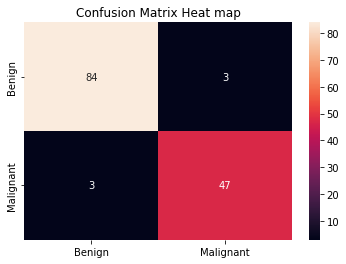

In [37]:
y_axis_labels = ['Benign','Malignant']

sns.heatmap(cm, annot=True, fmt='d',xticklabels=y_axis_labels ,yticklabels=y_axis_labels)
plt.title("Confusion Matrix Heat map")


Text(0.5, 1.0, 'Normalized Confusion Matrix Heat map')

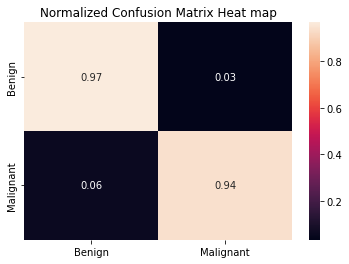

In [38]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=y_axis_labels , yticklabels=y_axis_labels)
plt.title("Normalized Confusion Matrix Heat map")

In [14]:
accuracy_score(y_test, y_pred)

0.9562043795620438

Computing the accuracy with K-Fold Cross Validation

In [16]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.70 %
Standard Deviation: 1.97 %
